## Observations and Insights 

1) Comparitively to the rest of the possible drug regimens, Ramicane and Capomulin had the lowest average tumor volumes of over time.  
2) Over time, mouse "y793"'s tumor volume (mm3) did reduce while on the Capomulin regmine. 
3) The correlation coefficient between mouse weight and average tumor volume is 0.53 indicating there is a moderating strong positive correlation between the two factors 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_mouse_df = pd.merge(mouse_metadata, study_results,
                                 how='outer', on='Mouse ID')
# Display the data table for preview
combined_mouse_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
combined_mouse_df['Mouse ID'].count()

1893

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mouse = combined_mouse_df[combined_mouse_df.duplicated(subset= ["Mouse ID","Timepoint"], keep = "first")]
dup_mouse["Mouse ID"].unique()

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# df[df['Age'] >= 25]

clean_mouse_df = combined_mouse_df[combined_mouse_df['Mouse ID'] != 'g989']
clean_mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_mouse_df['Mouse ID'].count()

1880

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

tumor_vol_means = clean_mouse_df.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
# tumor_vol_means

tumor_vol_medians = clean_mouse_df.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
tumor_vol_medians

tumor_summary_data = {'Mean Tumor Volume (mm3)': tumor_vol_means,
                      'Median Tumor Volume (mm3)': tumor_vol_medians, 
                     }

tumor_summary_df = pd.DataFrame(tumor_summary_data)
tumor_summary_df

,Mean Tumor Volume (mm3),Median Tumor Volume (mm3)
Drug Regimen,,
Capomulin,40.675741,41.557809
Ceftamin,52.591172,51.776157
Infubinol,52.884795,51.820584
Ketapril,55.235638,53.698743
Naftisol,54.331565,52.509285
Placebo,54.033581,52.288934
Propriva,52.320930,50.446266
Ramicane,40.216745,40.673236
Stelasyn,54.233149,52.431737


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
tumor_summary_agg_df = clean_mouse_df.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': ['mean', 'median']})
tumor_summary_agg_df

Tumor Volume (mm3)           
                           mean     median
Drug Regimen                              
Capomulin             40.675741  41.557809
Ceftamin              52.591172  51.776157
Infubinol             52.884795  51.820584
Ketapril              55.235638  53.698743
Naftisol              54.331565  52.509285
Placebo               54.033581  52.288934
Propriva              52.320930  50.446266
Ramicane              40.216745  40.673236
Stelasyn              54.233149  52.431737
Zoniferol             53.236507  51.818479

## Bar and Pie Charts

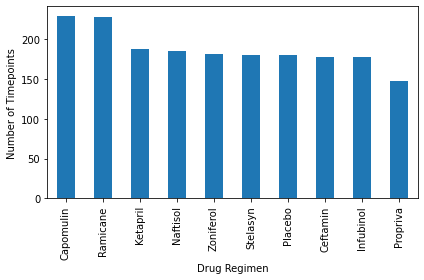

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

drug_counts = clean_mouse_df['Drug Regimen'].value_counts()

drug_counts.plot(kind="bar")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Timepoints")

plt.tight_layout()
plt.show()

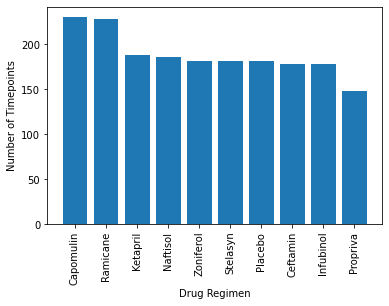

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

plt.bar(drug_counts.index.values, drug_counts.values)
plt.xticks(rotation=90)
plt.ylabel("Number of Timepoints")
plt.xlabel("Drug Regimen")
plt.show()

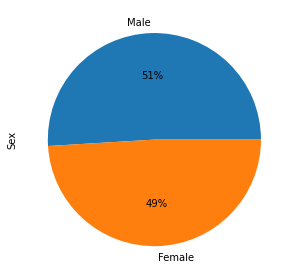

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_count = clean_mouse_df['Sex'].value_counts()
# gender_count

sex_count.plot(kind="pie", autopct='%1.0f%%')
plt.tight_layout()
plt.show()

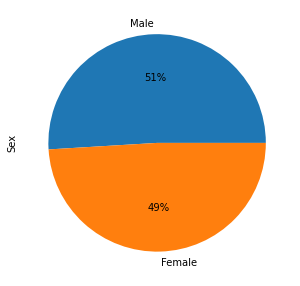

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_count.plot.pie(y='Sex', figsize=(5, 5), autopct='%1.0f%%')
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

promising_drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Start by getting the last (greatest) timepoint for each mouse
final_timepoint = clean_mouse_df.groupby("Mouse ID")["Timepoint"].max()
final_timepoint

final_timepoint_df = pd.DataFrame({'Timepoint': final_timepoint})
final_timepoint_df

# # Merge this group df with the original dataframe to get the tumor volume at the last timepoint
new_df = pd.merge(final_timepoint_df, clean_mouse_df, how='inner', on=['Mouse ID', 'Timepoint'])
# new_df

#25 for all 4 drug regimens requested
promising_drug_df = new_df[new_df['Drug Regimen'].isin(promising_drugs)]
promising_drug_df
                           
#new_df['Drug Regimen'].value_counts()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
3,a275,45,Ceftamin,Female,20,28,62.999356,3
6,a411,45,Ramicane,Male,3,22,38.407618,1
7,a444,45,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
238,y769,45,Ceftamin,Female,6,27,68.594745,4
239,y793,45,Capomulin,Male,17,17,31.896238,2
240,y865,45,Ceftamin,Male,23,26,64.729837,3
244,z578,45,Ramicane,Male,11,16,30.638696,0


In [14]:
# Put treatments into a list for for loop (and later for plot labels)

# iterate over the rows
tumor_vol_list = []

for drug in promising_drugs:

    # Create empty list to fill with tumor vol data (for plotting)
    drug_df = promising_drug_df[promising_drug_df['Drug Regimen'] == drug]
    tumor_vols = drug_df['Tumor Volume (mm3)']
    print(drug)
    
    tumor_vol_list.append(tumor_vols)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    # Locate the rows which contain mice on each drug and get the tumor volumes


    quartiles = tumor_vols.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    print(lowerq)
    print(upperq)
    print(iqr)
    print(quartiles[0.5])
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
    
    outlier_index = (tumor_vols < lower_bound) | (tumor_vols > upper_bound)
#   print(low_outlier_index)
    outlier_count = tumor_vols[outlier_index].count()
    print(outlier_count)

Capomulin
32.37735684
40.1592203
7.781863460000004
38.1251644
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
0
Ramicane
31.56046955
40.65900627
9.098536719999998
36.56165229
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
0
Infubinol
54.04860769
65.52574285
11.477135160000003
60.16518046
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.
1
Ceftamin
48.72207785
64.29983003
15.577752179999997
59.85195552
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.
0


<function matplotlib.pyplot.show(close=None, block=None)>

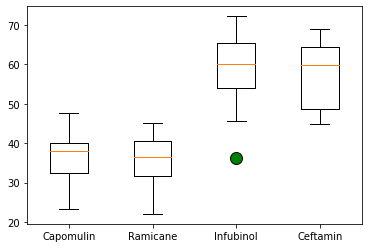

In [61]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
green_outlier = dict(markerfacecolor='green',markersize=12)
plt.boxplot(tumor_vol_list, labels= promising_drugs, flierprops=green_outlier)
plt.show


## Line and Scatter Plots

<AxesSubplot:xlabel='Timepoint'>

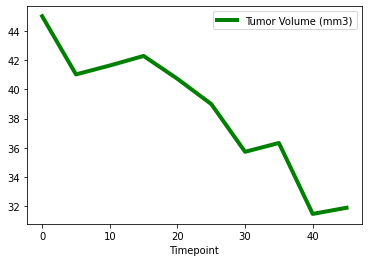

In [43]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
#create a dataframe of just capomulin mice.
Cap_df = clean_mouse_df.loc[clean_mouse_df["Drug Regimen"] == "Capomulin",:]

#select for just a mouse treated with capoumlin
selected_mouse = Cap_df.loc[Capomulin_df["Mouse ID"] == "y793"]
selected_mouse

#plot it
selected_mouse.plot.line(x='Timepoint', y='Tumor Volume (mm3)', linewidth=4,color="green")


<AxesSubplot:xlabel='Weight (g)', ylabel='Tumor Volume (mm3)'>

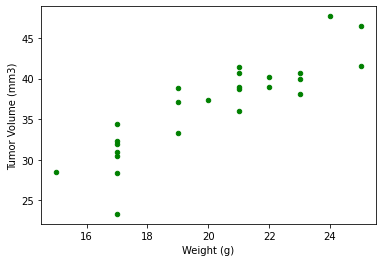

In [50]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

m_weight=promising_drug_df.loc[promising_drug_df["Drug Regimen"] == "Capomulin"]
m_weight.plot.scatter(x="Weight (g)", y="Tumor Volume (mm3)", color="green")

## Correlation and Regression

The correlation coefficient between mouse weight and average tumor volume is 0.53


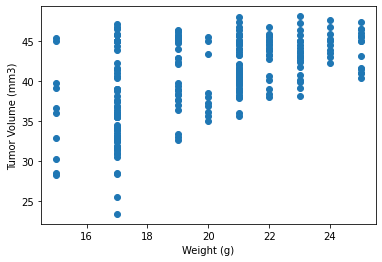

In [59]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

M_weight2 = Cap_df ["Weight (g)"]
tumor_vol_ave = Cap_df ["Tumor Volume (mm3)"]

correlation = st.pearsonr(M_weight2,tumor_vol_ave)
plt.scatter(M_weight2,tumor_vol_ave)
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
print(f"The correlation coefficient between mouse weight and average tumor volume is {round(correlation[0],2)}")
plt.show()